## Needed Things

In [267]:
#IMPORTS

import pandas as pd
import holidays
from datetime import date
from datetime import datetime, timedelta
import numpy as np
from scipy import stats

In [51]:
attendanceDF=pd.read_csv('/content/attendance-2.csv')
entityDF=pd.read_csv('/content/entity_schedule-2.csv')
attractionDF=pd.read_csv('/content/link_attraction_park-2.csv')
weatherDF=pd.read_csv('/content/weather_data-2.csv')
paradeDF=pd.read_excel('/content/parade_night_show.xlsx')
glossaryDF=pd.read_excel('/content/glossary.xlsx')

### Basic Parade Display

In [42]:
#prorpocessing paradeDF
paradeDF.drop(['Unnamed: 0'], inplace=True, axis=1)

In [ ]:
paradeDF

### Weather display

In [ ]:
weatherDF

## In this notebook the follwing datasets are preprocesses and merged:


1.   AttendanceDF
2.   EntityDF
3.   LinkAttractionDF



### attractionDF

In [52]:
#preprocessing attraction DF

attractionDF[['Attraction', 'Park']]=attractionDF['ATTRACTION;PARK'].apply(lambda x: pd.Series(x.split(';')))
attractionDF.drop(['ATTRACTION;PARK'], inplace=True, axis=1)

In [53]:
attractionDF

,Attraction,Park
0,Aeroplane Ride,Tivoli Gardens
1,Bumper Cars,PortAventura World
2,Bungee Jump,PortAventura World
3,Circus Train,PortAventura World
4,Crazy Bus,Tivoli Gardens
5,Crazy Dance,PortAventura World
6,Dizzy Dropper,PortAventura World
7,Drop Tower,PortAventura World
8,Flying Coaster,PortAventura World
9,Free Fall,PortAventura World


In [63]:
# now we will split in AttractionTivoli and AttractionPortAventura

TivoliAttractionDF=attractionDF[attractionDF['Park'] == 'Tivoli Gardens']
PortAventuraAttractionDF=attractionDF[attractionDF['Park'] == 'PortAventura World']

In [ ]:
TivoliAttractionDF=TivoliAttractionDF.drop_duplicates()
#standard data cleaning
TivoliAttractionDF

In [65]:
PortAventuraAttractionDF=PortAventuraAttractionDF.drop_duplicates()
#standard data cleaning
PortAventuraAttractionDF

,Attraction,Park
1,Bumper Cars,PortAventura World
2,Bungee Jump,PortAventura World
3,Circus Train,PortAventura World
5,Crazy Dance,PortAventura World
6,Dizzy Dropper,PortAventura World
7,Drop Tower,PortAventura World
8,Flying Coaster,PortAventura World
9,Free Fall,PortAventura World
10,Giant Wheel,PortAventura World
11,Giga Coaster,PortAventura World


### EntityDF

In [210]:
entityDF

,REF_CLOSING_DESCRIPTION,Attraction,ENTITY_TYPE,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE
0,NaN,Tivoli Gardens,PARK,2018-11-19 10:00:00.000,2018-11-19 18:00:00.000,2018-11-20 08:24:32.000,2018-11-19
1,NaN,Dizzy Dropper,ATTR,2022-04-07 08:30:00.000,2022-04-07 22:04:00.000,2022-04-08 08:00:30.000,2022-04-07
2,NaN,Sling Shot,ATTR,2018-03-28 08:37:00.000,2018-03-28 18:12:00.000,2018-03-29 08:24:37.000,2018-03-28
3,NaN,Gondola,ATTR,2019-04-11 09:55:00.000,2019-04-11 20:19:00.000,2019-04-12 08:59:29.000,2019-04-11
4,NaN,Monorail,ATTR,2019-06-29 08:30:00.000,2019-06-29 20:35:00.000,2019-06-30 08:14:16.000,2019-06-29
...,...,...,...,...,...,...,...
38302,NaN,Log Flume,ATTR,2022-08-20 08:25:00.000,2022-08-20 23:09:00.000,2022-08-21 09:16:50.000,2022-08-20
38303,Fermeture Réhab,Giga Coaster,ATTR,2022-08-20 23:59:00.000,2022-08-20 23:59:00.000,2022-08-21 09:16:53.000,2022-08-20
38304,NaN,Inverted Coaster,ATTR,2022-08-20 09:30:00.000,2022-08-20 17:48:00.000,2022-08-21 09:16:55.000,2022-08-20
38305,NaN,Inverted Coaster,ATTR,2022-08-22 09:20:00.000,2022-08-22 17:54:00.000,2022-08-23 09:02:42.000,2022-08-22


In [211]:
entityDF.rename(columns={'ENTITY_DESCRIPTION_SHORT':'Attraction'}, inplace=True)

In [212]:
#convert to date the WORK_DATE

entityDF['WORK_DATE']=pd.to_datetime(entityDF['WORK_DATE'], format='%Y-%m-%d')

### AttendanceDF

#### Code

In [162]:
attendanceDF

,USAGE_DATE,FACILITY_NAME,attendance
0,2018-06-01,PortAventura World,46804
1,2018-06-01,Tivoli Gardens,20420
2,2018-06-02,PortAventura World,57940
3,2018-06-02,Tivoli Gardens,29110
4,2018-06-03,PortAventura World,44365
...,...,...,...
2362,2022-07-24,Tivoli Gardens,26798
2363,2022-07-25,PortAventura World,53764
2364,2022-07-25,Tivoli Gardens,27061
2365,2022-07-26,PortAventura World,26391


In [163]:
# split in two atendance df

TivoliAttendanceDF=attendanceDF[attendanceDF['FACILITY_NAME']=='Tivoli Gardens']
PortAventuraAttendanceDF=attendanceDF[attendanceDF['FACILITY_NAME']=='PortAventura World']

#basic cleaning

TivoliAttendanceDF=TivoliAttendanceDF.drop_duplicates()
PortAventuraAttendanceDF=PortAventuraAttendanceDF.drop_duplicates()

In [164]:
TivoliAttendanceDF

,USAGE_DATE,FACILITY_NAME,attendance
1,2018-06-01,Tivoli Gardens,20420
3,2018-06-02,Tivoli Gardens,29110
5,2018-06-03,Tivoli Gardens,23727
7,2018-06-04,Tivoli Gardens,15115
9,2018-06-05,Tivoli Gardens,16373
...,...,...,...
2358,2022-07-22,Tivoli Gardens,27924
2360,2022-07-23,Tivoli Gardens,27538
2362,2022-07-24,Tivoli Gardens,26798
2364,2022-07-25,Tivoli Gardens,27061


In [165]:
TivoliAttendanceDF.info()
PortAventuraAttendanceDF.info()
# we need to convert usage_date in a date


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1185 entries, 1 to 2366
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   USAGE_DATE     1185 non-null   object
 1   FACILITY_NAME  1185 non-null   object
 2   attendance     1185 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 69.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1182 entries, 0 to 2365
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   USAGE_DATE     1182 non-null   object
 1   FACILITY_NAME  1182 non-null   object
 2   attendance     1182 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 36.9+ KB


In [166]:
TivoliAttendanceDF['USAGE_DATE']=pd.to_datetime(TivoliAttendanceDF['USAGE_DATE'], format='%Y-%m-%d')
PortAventuraAttendanceDF['USAGE_DATE']=pd.to_datetime(PortAventuraAttendanceDF['USAGE_DATE'], format='%Y-%m-%d')

In [167]:
TivoliAttendanceDF.info()
PortAventuraAttendanceDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1185 entries, 1 to 2366
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   USAGE_DATE     1185 non-null   datetime64[ns]
 1   FACILITY_NAME  1185 non-null   object        
 2   attendance     1185 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 69.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1182 entries, 0 to 2365
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   USAGE_DATE     1182 non-null   datetime64[ns]
 1   FACILITY_NAME  1182 non-null   object        
 2   attendance     1182 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 36.9+ KB


In [168]:
# adding the date of the week to the Port dataset
PortAventuraAttendanceDF['DayOfWeek']=PortAventuraAttendanceDF['USAGE_DATE'].dt.dayofweek

# splitting in weekdays and weekends

# Weekdays DataFrame (Monday=0, ..., Friday=4)
WeekPortAttendanceDF= PortAventuraAttendanceDF[PortAventuraAttendanceDF['DayOfWeek'].isin(range(5))]

# Weekends DataFrame (Saturday=5, Sunday=6)
WEndPortAttendanceDF= PortAventuraAttendanceDF[PortAventuraAttendanceDF['DayOfWeek'].isin([5,6])]


In [169]:
WeekPortAttendanceDF

,USAGE_DATE,FACILITY_NAME,attendance,DayOfWeek
0,2018-06-01,PortAventura World,46804,4
6,2018-06-04,PortAventura World,37617,0
8,2018-06-05,PortAventura World,32438,1
10,2018-06-06,PortAventura World,28399,2
12,2018-06-07,PortAventura World,39436,3
...,...,...,...,...
2353,2022-07-20,PortAventura World,45627,2
2355,2022-07-21,PortAventura World,52637,3
2357,2022-07-22,PortAventura World,49586,4
2363,2022-07-25,PortAventura World,53764,0


In [170]:
WeekAttendanceDF=WeekPortAttendanceDF.drop(['DayOfWeek'], inplace=False, axis=1)
WEndAttendanceDF=WEndPortAttendanceDF.drop(['DayOfWeek'], inplace=False, axis=1)

In [171]:
WEndAttendanceDF

,USAGE_DATE,FACILITY_NAME,attendance
2,2018-06-02,PortAventura World,57940
4,2018-06-03,PortAventura World,44365
16,2018-06-09,PortAventura World,52664
18,2018-06-10,PortAventura World,47025
30,2018-06-16,PortAventura World,54361
...,...,...,...
2333,2022-07-10,PortAventura World,42301
2345,2022-07-16,PortAventura World,48408
2347,2022-07-17,PortAventura World,40938
2359,2022-07-23,PortAventura World,51748


In [172]:
# Get the Spanish Holidays
holidays18 = holidays.Spain(years=[2018])
holidays19 = holidays.Spain(years=[2019])
holidays20 = holidays.Spain(years=[2020])
holidays21 = holidays.Spain(years=[2021])
holidays22 = holidays.Spain(years=[2022])
holidays23 = holidays.Spain(years=[2023])

# Convert to a list
holiday_dates = list(holidays18) + \
                list(holidays19) + \
                list(holidays20) + \
                list(holidays21) + \
                list(holidays22) + \
                list(holidays23)


In [173]:
HolPortAttendanceDF=PortAventuraAttendanceDF[PortAventuraAttendanceDF['USAGE_DATE'].isin(holiday_dates)]

In [174]:
HolAttendanceDF=HolPortAttendanceDF.drop(['DayOfWeek'], inplace=False, axis=1)

In [175]:
HolAttendanceDF

,USAGE_DATE,FACILITY_NAME,attendance
150,2018-08-15,PortAventura World,53729
266,2018-10-12,PortAventura World,34840
306,2018-11-01,PortAventura World,54615
376,2018-12-06,PortAventura World,33697
380,2018-12-08,PortAventura World,61284
414,2018-12-25,PortAventura World,66441
428,2019-01-01,PortAventura World,57824
644,2019-04-19,PortAventura World,61252
668,2019-05-01,PortAventura World,56939
880,2019-08-15,PortAventura World,52264


In [176]:
# to clean the data we need to drop the rows so that weekend and weekdays do not contain holidays

WeekAttendanceDF=WeekAttendanceDF[~WeekAttendanceDF['USAGE_DATE'].isin(holiday_dates)]
WEndAttendanceDF=WEndAttendanceDF[~WEndAttendanceDF['USAGE_DATE'].isin(holiday_dates)]

In [ ]:
# rename the USAGE_DATE as WORK_DATE

WeekAttendanceDF.rename(columns={'USAGE_DATE':'WORK_DATE'}, inplace=True)

WEndAttendanceDF.rename(columns={'USAGE_DATE':'WORK_DATE'}, inplace=True)

HolAttendanceDF.rename(columns={'USAGE_DATE':'WORK_DATE'}, inplace=True)

In [ ]:
WeekAttendanceDF

In [ ]:
WEndAttendanceDF

In [ ]:
HolAttendanceDF

#### Some visualisation for Attendance

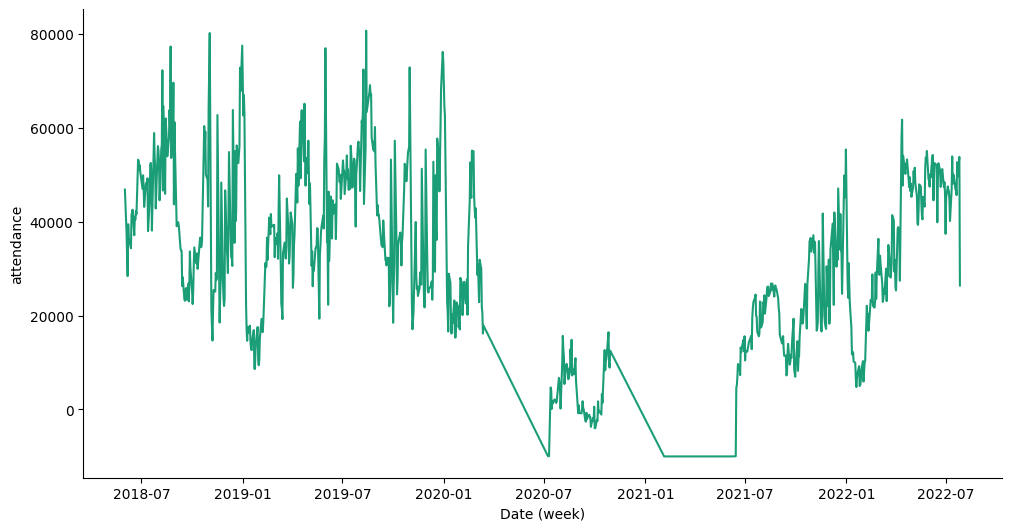

In [217]:
# @title Date (week) vs attendance

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['WORK_DATE']
  ys = series['attendance']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = WeekAttendanceDF.sort_values('WORK_DATE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date (week)')
_ = plt.ylabel('attendance')

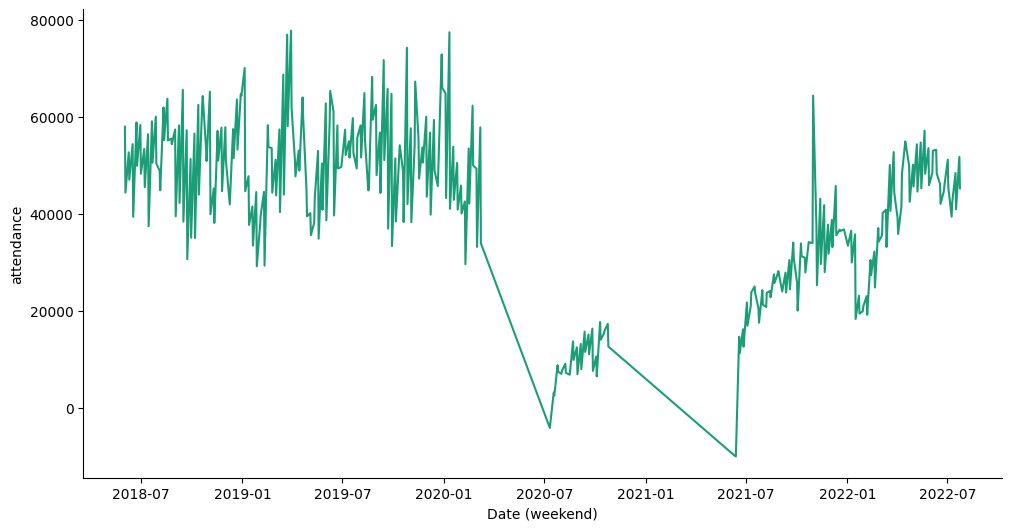

In [220]:
# @title Date (weekend) vs attendance

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['WORK_DATE']
  ys = series['attendance']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = WEndAttendanceDF.sort_values('WORK_DATE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date (weekend)')
_ = plt.ylabel('attendance')

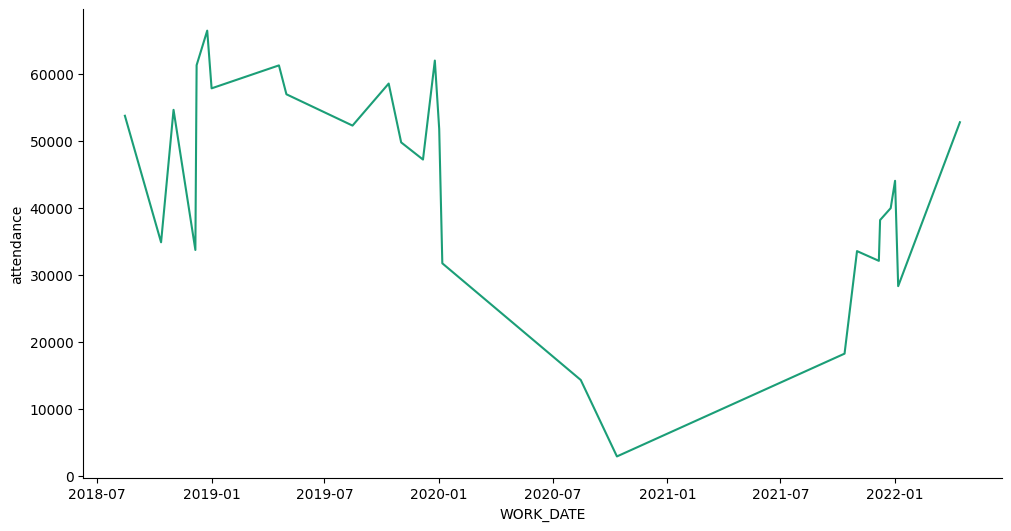

In [226]:
# @title Date (holiday) vs attendance

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['WORK_DATE']
  ys = series['attendance']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = HolAttendanceDF.sort_values('WORK_DATE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('WORK_DATE')
_ = plt.ylabel('attendance')

([0, 1, 2],
 [Text(0, 0, 'Median Weekly attendance'),
  Text(1, 0, 'Median Weekend attendance'),
  Text(2, 0, 'Median Holiday attendance')])

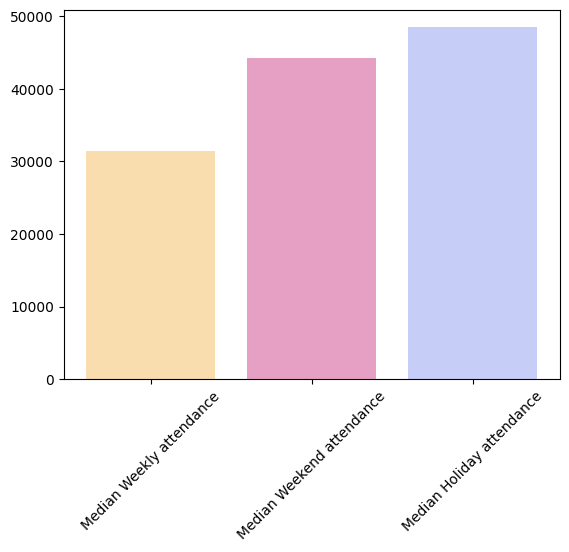

In [230]:
# computing average attendance for every dataset

medianWeek=WeekAttendanceDF['attendance'].median()
medianWEnd=WEndAttendanceDF['attendance'].median()
medianHol=HolAttendanceDF['attendance'].median()

categories=["Median Weekly attendance", "Median Weekend attendance", "Median Holiday attendance"]
values=[medianWeek,medianWEnd,medianHol]
colors = ['#FADDAF', '#E6A0C4', '#C6CDF7']

plt.bar(categories, values, color=colors)
plt.xticks(rotation=45)

### Merging Datasets

#### Merging Entity and Attraction

now we have three clean datasets for attendance in Port:

1.   WeekAttendanceDF = Attendance during weekdays
2.   WEndAttendanceDF = Attendance during weekends
3.   HolAttendanceDF  = Attendance during holidays

plus 2 other datasets:

1.   Entity
2.   PortAventuraAttractionDF

we want to merge Entity and PortAventuraAttractionDF using attraction/

In [201]:
entityDF

,REF_CLOSING_DESCRIPTION,Attraction,ENTITY_TYPE,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE
0,NaN,Tivoli Gardens,PARK,2018-11-19 10:00:00.000,2018-11-19 18:00:00.000,2018-11-20 08:24:32.000,2018-11-19
1,NaN,Dizzy Dropper,ATTR,2022-04-07 08:30:00.000,2022-04-07 22:04:00.000,2022-04-08 08:00:30.000,2022-04-07
2,NaN,Sling Shot,ATTR,2018-03-28 08:37:00.000,2018-03-28 18:12:00.000,2018-03-29 08:24:37.000,2018-03-28
3,NaN,Gondola,ATTR,2019-04-11 09:55:00.000,2019-04-11 20:19:00.000,2019-04-12 08:59:29.000,2019-04-11
4,NaN,Monorail,ATTR,2019-06-29 08:30:00.000,2019-06-29 20:35:00.000,2019-06-30 08:14:16.000,2019-06-29
...,...,...,...,...,...,...,...
38302,NaN,Log Flume,ATTR,2022-08-20 08:25:00.000,2022-08-20 23:09:00.000,2022-08-21 09:16:50.000,2022-08-20
38303,Fermeture Réhab,Giga Coaster,ATTR,2022-08-20 23:59:00.000,2022-08-20 23:59:00.000,2022-08-21 09:16:53.000,2022-08-20
38304,NaN,Inverted Coaster,ATTR,2022-08-20 09:30:00.000,2022-08-20 17:48:00.000,2022-08-21 09:16:55.000,2022-08-20
38305,NaN,Inverted Coaster,ATTR,2022-08-22 09:20:00.000,2022-08-22 17:54:00.000,2022-08-23 09:02:42.000,2022-08-22


In [199]:
PortAventuraAttractionDF.head()

,Attraction,Park
1,Bumper Cars,PortAventura World
2,Bungee Jump,PortAventura World
3,Circus Train,PortAventura World
5,Crazy Dance,PortAventura World
6,Dizzy Dropper,PortAventura World


In [ ]:
TivoliAttractionDF

In [195]:
PortEntityDF=pd.merge(entityDF,PortAventuraAttractionDF,on='Attraction', how='inner')

In [196]:
PortEntityDF

,REF_CLOSING_DESCRIPTION,Attraction,ENTITY_TYPE,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE,Park
0,NaN,Dizzy Dropper,ATTR,2022-04-07 08:30:00.000,2022-04-07 22:04:00.000,2022-04-08 08:00:30.000,2022-04-07,PortAventura World
1,NaN,Dizzy Dropper,ATTR,2018-12-29 08:00:00.000,2018-12-29 21:26:00.000,2018-12-30 07:29:36.000,2018-12-29,PortAventura World
2,NaN,Dizzy Dropper,ATTR,2019-03-18 08:30:00.000,2019-03-18 19:14:00.000,2019-03-19 07:46:24.000,2019-03-18,PortAventura World
3,NaN,Dizzy Dropper,ATTR,2019-01-06 08:00:00.000,2019-01-06 20:13:00.000,2019-01-07 07:36:26.000,2019-01-06,PortAventura World
4,NaN,Dizzy Dropper,ATTR,2020-01-17 08:30:00.000,2020-01-17 17:30:00.000,2020-01-18 07:38:20.000,2020-01-17,PortAventura World
...,...,...,...,...,...,...,...,...
23346,NaN,Vertical Drop,ATTR,2022-08-21 09:30:00.000,2022-08-21 22:38:00.000,2022-08-22 07:43:32.000,2022-08-21,PortAventura World
23347,NaN,Vertical Drop,ATTR,2022-08-19 09:28:00.000,2022-08-19 22:35:00.000,2022-08-20 07:36:56.000,2022-08-19,PortAventura World
23348,NaN,Vertical Drop,ATTR,2022-08-20 09:30:00.000,2022-08-20 22:40:00.000,2022-08-21 09:16:46.000,2022-08-20,PortAventura World
23349,NaN,Vertical Drop,ATTR,2022-08-18 09:30:00.000,2022-08-18 22:44:00.000,2022-08-19 07:56:30.000,2022-08-18,PortAventura World


In [197]:
EntityDF=PortEntityDF.drop(['ENTITY_TYPE'], inplace=False, axis=1)

In [245]:
EntityDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23351 entries, 0 to 23350
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   REF_CLOSING_DESCRIPTION  2769 non-null   object
 1   Attraction               23351 non-null  object
 2   DEB_TIME                 23351 non-null  object
 3   FIN_TIME                 23351 non-null  object
 4   UPDATE_TIME              23351 non-null  object
 5   WORK_DATE                23351 non-null  object
 6   Park                     23351 non-null  object
dtypes: object(7)
memory usage: 1.9+ MB


In [246]:
# we neee to convert WORK_DATE in a date

EntityDF['WORK_DATE']=pd.to_datetime(EntityDF['WORK_DATE'], format='%Y-%m-%d')

In [247]:
EntityDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23351 entries, 0 to 23350
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   REF_CLOSING_DESCRIPTION  2769 non-null   object        
 1   Attraction               23351 non-null  object        
 2   DEB_TIME                 23351 non-null  object        
 3   FIN_TIME                 23351 non-null  object        
 4   UPDATE_TIME              23351 non-null  object        
 5   WORK_DATE                23351 non-null  datetime64[ns]
 6   Park                     23351 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 1.9+ MB


now EnttyDF has also the park name and it's only for PortAventura.

#### Now we will merge Entity and Attendance using date

In [248]:
WeekEntity=pd.merge(EntityDF,WeekAttendanceDF,on='WORK_DATE', how='inner')
WEndEntity=pd.merge(EntityDF,WEndAttendanceDF,on='WORK_DATE', how='inner')
HolEntity= pd.merge(EntityDF,HolAttendanceDF,on='WORK_DATE', how='inner')

In [251]:
WeekEntity

,REF_CLOSING_DESCRIPTION,Attraction,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE,Park,FACILITY_NAME,attendance
0,NaN,Dizzy Dropper,2022-04-07 08:30:00.000,2022-04-07 22:04:00.000,2022-04-08 08:00:30.000,2022-04-07,PortAventura World,PortAventura World,36795
1,NaN,Kiddie Coaster,2022-04-07 09:30:00.000,2022-04-07 20:13:00.000,2022-04-08 08:00:31.000,2022-04-07,PortAventura World,PortAventura World,36795
2,NaN,Oz Theatre,2022-04-07 11:55:00.000,2022-04-07 17:21:00.000,2022-04-08 08:00:28.000,2022-04-07,PortAventura World,PortAventura World,36795
3,NaN,Free Fall,2022-04-07 10:00:00.000,2022-04-07 18:01:00.000,2022-04-08 08:00:34.000,2022-04-07,PortAventura World,PortAventura World,36795
4,Fermeture Réhab,Giga Coaster,2022-04-07 23:59:00.000,2022-04-07 23:59:00.000,2022-04-08 08:00:31.000,2022-04-07,PortAventura World,PortAventura World,36795
...,...,...,...,...,...,...,...,...,...
13063,NaN,Go-Karts,2019-04-26 09:24:00.000,2019-04-26 22:20:00.000,2019-04-27 09:26:34.000,2019-04-26,PortAventura World,PortAventura World,53548
13064,NaN,Haunted House,2019-04-26 09:47:00.000,2019-04-26 20:58:00.000,2019-04-27 09:26:36.000,2019-04-26,PortAventura World,PortAventura World,53548
13065,NaN,Zipline,2019-04-26 08:09:00.000,2019-04-26 22:14:00.000,2019-04-27 09:26:35.000,2019-04-26,PortAventura World,PortAventura World,53548
13066,NaN,Crazy Dance,2019-04-26 09:21:00.000,2019-04-26 22:04:00.000,2019-04-27 09:26:29.000,2019-04-26,PortAventura World,PortAventura World,53548


## Cleaning the Merged Dataset



In [254]:
# create copies of the dataframes

WeekDF=WeekEntity
WEndDF=WEndEntity
HolDF=HolEntity

#### Filtering Out COVID
##### we want to filter out the dates for Covid, keeping a 1 month buffer since and from the ending/beginning of restriction as such period is still very biased

In [256]:
#create such a covid list

start_date = datetime(2020, 2, 1)
end_date_july_2021 = datetime(2021, 7, 31)

covid = [start_date + timedelta(days=x) for x in range((end_date_july_2021 - start_date).days + 1)]


In [257]:
WeekAttendanceDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 2365
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   WORK_DATE      825 non-null    datetime64[ns]
 1   FACILITY_NAME  825 non-null    object        
 2   attendance     825 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 25.8+ KB


In [258]:
WeekAttendanceDF2=WeekAttendanceDF # working on a copy to test

WeekAttendanceDF2=WeekAttendanceDF2[~WeekAttendanceDF2['WORK_DATE'].isin(covid)]

In [ ]:
WeekDF.info()
WEndDF.info()
HolDF.info()

In [263]:
NoCovWeekDF=WeekDF[~WeekDF['WORK_DATE'].isin(covid)]
NoCovWEndDF=WEndDF[~WEndDF['WORK_DATE'].isin(covid)]
NoCovHolDF=HolDF[~HolDF['WORK_DATE'].isin(covid)]

In [ ]:
NoCovWeekDF

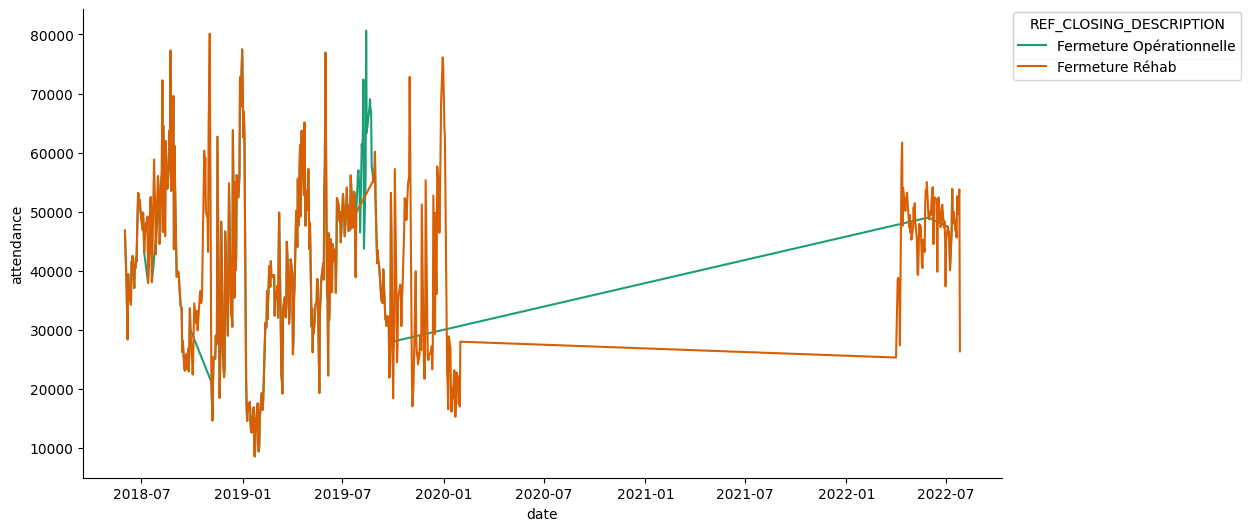

In [266]:
# @title Date (week) vs attendance

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['WORK_DATE']
  ys = series['attendance']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = NoCovWeekDF.sort_values('WORK_DATE', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('REF_CLOSING_DESCRIPTION')):
  _plot_series(series, series_name, i)
  fig.legend(title='REF_CLOSING_DESCRIPTION', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('attendance')

#### Filtering Out OUTLIERS

In [268]:
NoCovWeekDF.head()

,REF_CLOSING_DESCRIPTION,Attraction,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE,Park,FACILITY_NAME,attendance
0,NaN,Dizzy Dropper,2022-04-07 08:30:00.000,2022-04-07 22:04:00.000,2022-04-08 08:00:30.000,2022-04-07,PortAventura World,PortAventura World,36795
1,NaN,Kiddie Coaster,2022-04-07 09:30:00.000,2022-04-07 20:13:00.000,2022-04-08 08:00:31.000,2022-04-07,PortAventura World,PortAventura World,36795
2,NaN,Oz Theatre,2022-04-07 11:55:00.000,2022-04-07 17:21:00.000,2022-04-08 08:00:28.000,2022-04-07,PortAventura World,PortAventura World,36795
3,NaN,Free Fall,2022-04-07 10:00:00.000,2022-04-07 18:01:00.000,2022-04-08 08:00:34.000,2022-04-07,PortAventura World,PortAventura World,36795
4,Fermeture Réhab,Giga Coaster,2022-04-07 23:59:00.000,2022-04-07 23:59:00.000,2022-04-08 08:00:31.000,2022-04-07,PortAventura World,PortAventura World,36795


In [326]:
# create copies of the dataframes

NoCovWeekDF2=NoCovWeekDF
NoCovWEndDF2=NoCovWEndDF
NoCovHolDF2=NoCovHolDF

# define the quantiles

W_q_low = NoCovWeekDF2["attendance"].quantile(0.02)
W_q_hi  = NoCovWeekDF2["attendance"].quantile(0.98)

WE_q_low = NoCovWEndDF2["attendance"].quantile(0.02)
WE_q_hi  = NoCovWEndDF2["attendance"].quantile(0.98)

H_q_low = NoCovHolDF2["attendance"].quantile(0.02)
H_q_hi  = NoCovHolDF2["attendance"].quantile(0.98)

# filter out the values in the defined quantiles

ClWeekDF = NoCovWeekDF2[(NoCovWeekDF2["attendance"] < W_q_hi) & (NoCovWeekDF2["attendance"] > W_q_low)]
ClWEndDF = NoCovWEndDF2[(NoCovWEndDF2["attendance"] < W_q_hi) & (NoCovWEndDF2["attendance"] > W_q_low)]
ClHolDF =  NoCovHolDF2[(NoCovHolDF2["attendance"] < W_q_hi) & (NoCovHolDF2["attendance"] > W_q_low)]

In [327]:
print(W_q_low)
print(W_q_hi)

14575.0
72199.0


In [328]:
ClWeekDF

,REF_CLOSING_DESCRIPTION,Attraction,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE,Park,FACILITY_NAME,attendance
0,NaN,Dizzy Dropper,2022-04-07 08:30:00.000,2022-04-07 22:04:00.000,2022-04-08 08:00:30.000,2022-04-07,PortAventura World,PortAventura World,36795
1,NaN,Kiddie Coaster,2022-04-07 09:30:00.000,2022-04-07 20:13:00.000,2022-04-08 08:00:31.000,2022-04-07,PortAventura World,PortAventura World,36795
2,NaN,Oz Theatre,2022-04-07 11:55:00.000,2022-04-07 17:21:00.000,2022-04-08 08:00:28.000,2022-04-07,PortAventura World,PortAventura World,36795
3,NaN,Free Fall,2022-04-07 10:00:00.000,2022-04-07 18:01:00.000,2022-04-08 08:00:34.000,2022-04-07,PortAventura World,PortAventura World,36795
4,Fermeture Réhab,Giga Coaster,2022-04-07 23:59:00.000,2022-04-07 23:59:00.000,2022-04-08 08:00:31.000,2022-04-07,PortAventura World,PortAventura World,36795
...,...,...,...,...,...,...,...,...,...
13063,NaN,Go-Karts,2019-04-26 09:24:00.000,2019-04-26 22:20:00.000,2019-04-27 09:26:34.000,2019-04-26,PortAventura World,PortAventura World,53548
13064,NaN,Haunted House,2019-04-26 09:47:00.000,2019-04-26 20:58:00.000,2019-04-27 09:26:36.000,2019-04-26,PortAventura World,PortAventura World,53548
13065,NaN,Zipline,2019-04-26 08:09:00.000,2019-04-26 22:14:00.000,2019-04-27 09:26:35.000,2019-04-26,PortAventura World,PortAventura World,53548
13066,NaN,Crazy Dance,2019-04-26 09:21:00.000,2019-04-26 22:04:00.000,2019-04-27 09:26:29.000,2019-04-26,PortAventura World,PortAventura World,53548


### Splitting the datasets in PreCovid and PostCovid

In [329]:
start_covid=covid[0]
end_covid=covid[-1]

PreCovWeekDF=ClWeekDF[ClWeekDF['WORK_DATE']<start_covid]
PostCovWeekDF=ClWeekDF[ClWeekDF['WORK_DATE']>end_covid]

PreCovWEndDF=ClWEndDF[ClWEndDF['WORK_DATE']<start_covid]
PostCovWEndDF=ClWEndDF[ClWEndDF['WORK_DATE']>end_covid]

PreCovHolDF=ClHolDF[ClHolDF['WORK_DATE']<start_covid]
PostCovHolDF=ClHolDF[ClHolDF['WORK_DATE']>end_covid]
#we should discard this one as there's only one day of vacation post covid


#### Some PreCovid and PostCovid Visualisation

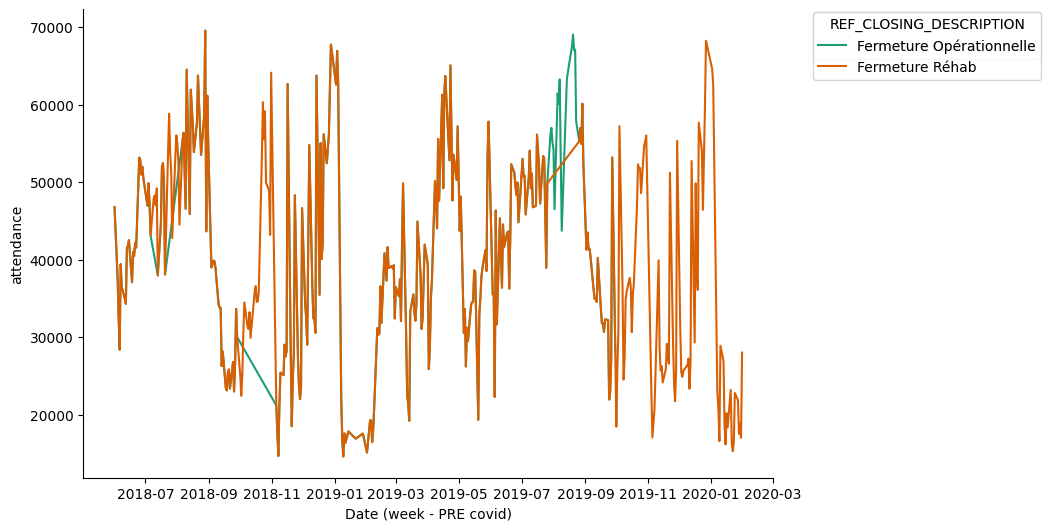

In [330]:
# @title Date (week - PRE covid) vs attendance

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['WORK_DATE']
  ys = series['attendance']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(8, 5.2), layout='constrained')
df_sorted = PreCovWeekDF.sort_values('WORK_DATE', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('REF_CLOSING_DESCRIPTION')):
  _plot_series(series, series_name, i)
  fig.legend(title='REF_CLOSING_DESCRIPTION', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date (week - PRE covid)')
_ = plt.ylabel('attendance')

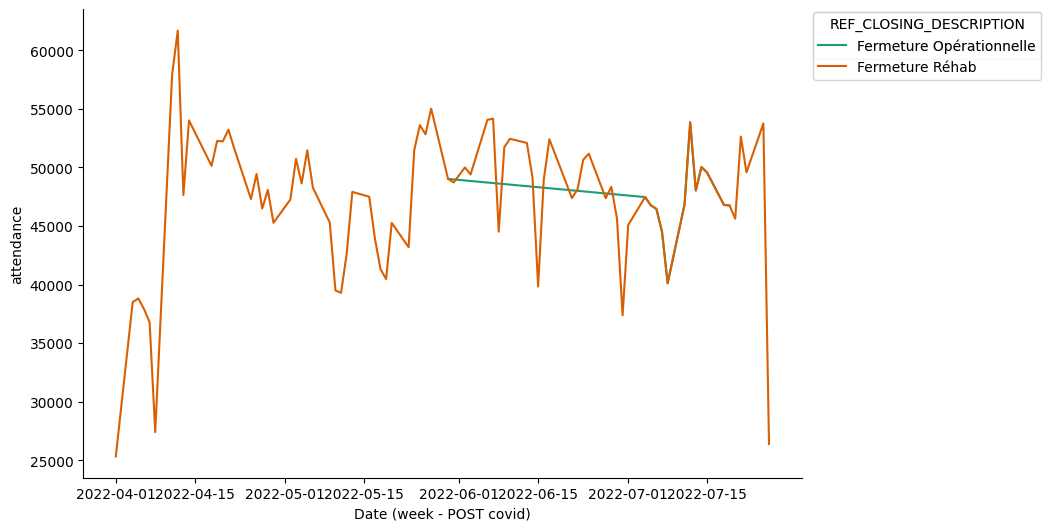

In [331]:
# @title Date (week - POST covid) vs attendance

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['WORK_DATE']
  ys = series['attendance']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(8, 5.2), layout='constrained')
df_sorted = PostCovWeekDF.sort_values('WORK_DATE', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('REF_CLOSING_DESCRIPTION')):
  _plot_series(series, series_name, i)
  fig.legend(title='REF_CLOSING_DESCRIPTION', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date (week - POST covid)')
_ = plt.ylabel('attendance')

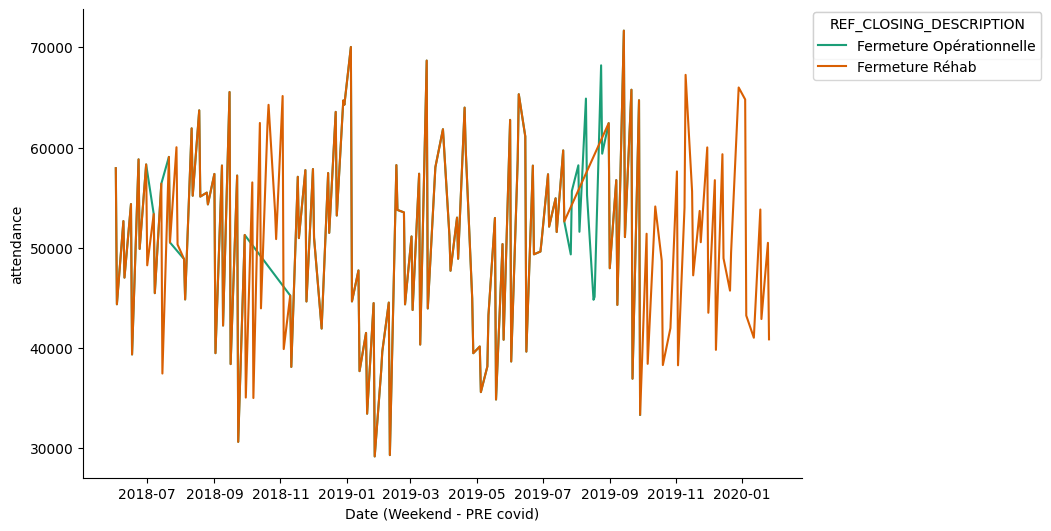

In [332]:
# @title Date (Weekend - PRE covid) vs attendance

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['WORK_DATE']
  ys = series['attendance']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(8, 5.2), layout='constrained')
df_sorted = PreCovWEndDF.sort_values('WORK_DATE', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('REF_CLOSING_DESCRIPTION')):
  _plot_series(series, series_name, i)
  fig.legend(title='REF_CLOSING_DESCRIPTION', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date (Weekend - PRE covid)')
_ = plt.ylabel('attendance')

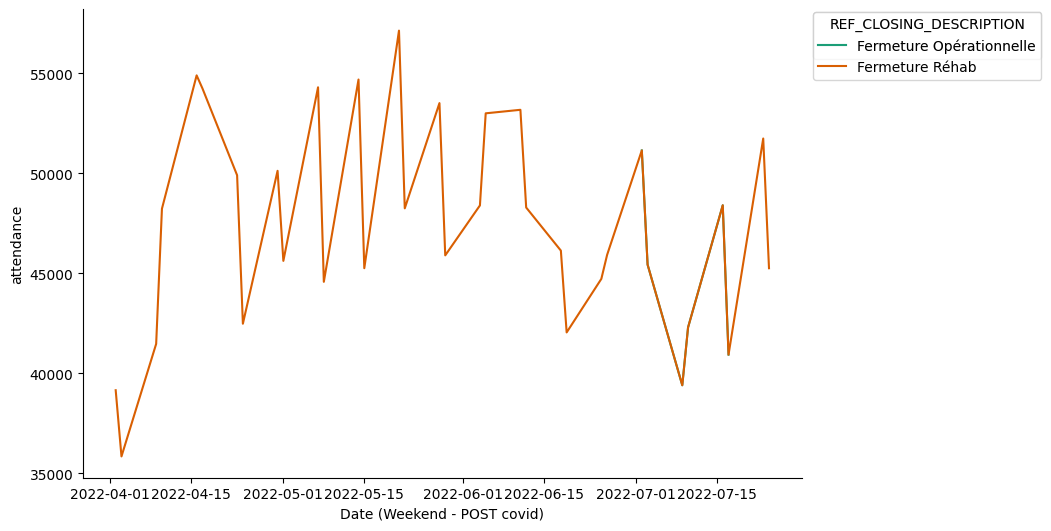

In [333]:
# @title Date (Weekend - POST covid) vs attendance

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['WORK_DATE']
  ys = series['attendance']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(8, 5.2), layout='constrained')
df_sorted = PostCovWEndDF.sort_values('WORK_DATE', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('REF_CLOSING_DESCRIPTION')):
  _plot_series(series, series_name, i)
  fig.legend(title='REF_CLOSING_DESCRIPTION', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date (Weekend - POST covid)')
_ = plt.ylabel('attendance')

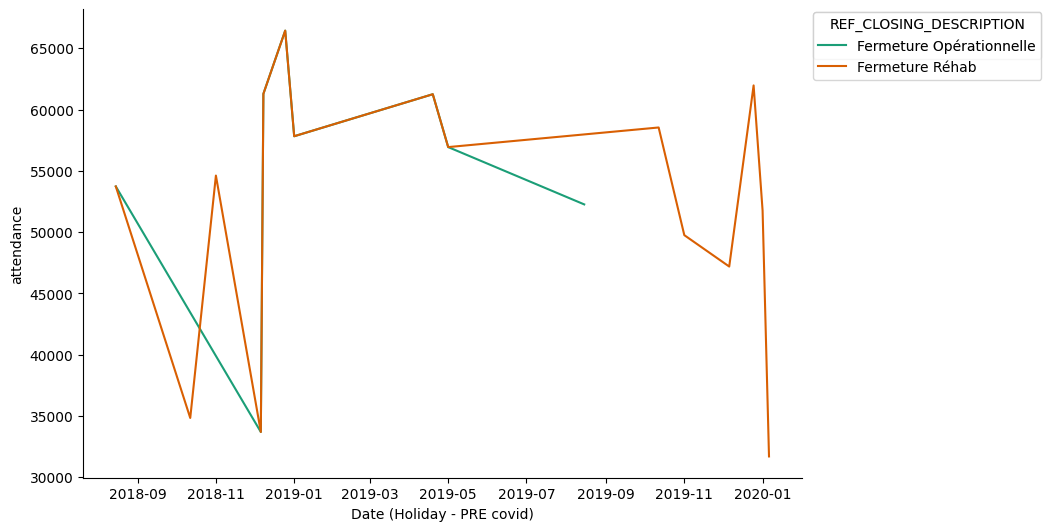

In [334]:
# @title Date (Holiday - PRE covid) vs attendance

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['WORK_DATE']
  ys = series['attendance']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(8, 5.2), layout='constrained')
df_sorted = PreCovHolDF.sort_values('WORK_DATE', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('REF_CLOSING_DESCRIPTION')):
  _plot_series(series, series_name, i)
  fig.legend(title='REF_CLOSING_DESCRIPTION', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date (Holiday - PRE covid)')
_ = plt.ylabel('attendance')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'week-preCovid'),
  Text(1, 0, 'week-postCovid'),
  Text(2, 0, 'weekend-preCovid'),
  Text(3, 0, 'weekend-postCovid'),
  Text(4, 0, 'holiday-preCovid')])

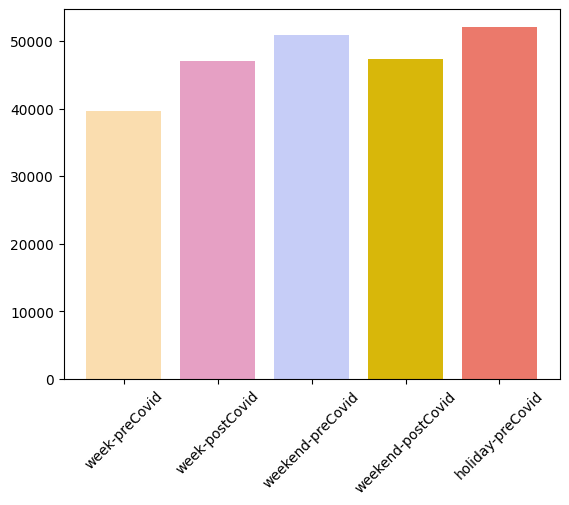

In [335]:
# @title Affluence Avg
AvgWeekPreCovid=PreCovWeekDF['attendance'].mean()
AvgWeekPostCovid=PostCovWeekDF['attendance'].mean()

AvgWEndPreCovid=PreCovWEndDF['attendance'].mean()
AvgWEndPostCovid=PostCovWEndDF['attendance'].mean()

AvgHolPreCovid=PreCovHolDF['attendance'].mean()

values=[AvgWeekPreCovid,AvgWeekPostCovid,AvgWEndPreCovid,AvgWEndPostCovid,AvgHolPreCovid]
classes=["week-preCovid", "week-postCovid", "weekend-preCovid", "weekend-postCovid", "holiday-preCovid"]

wes_anderson_colors = [
    '#FADDAF',  # Pastel yellow
    '#E6A0C4',  # Muted pink
    '#C6CDF7',  # Light blue
    '#D8B70A',  # Gold
    '#EB796B',  # Salmon pink
    '#73937E',  # Muted green
    '#AB947E',  # Warm beige
    '#9A8822',  # Olive green
    '#3E423A',  # Dark moss green
    '#9B1B30',  # Rich maroon
]

plt.bar(classes, values, color=wes_anderson_colors)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'week-preCovid'),
  Text(1, 0, 'week-postCovid'),
  Text(2, 0, 'weekend-preCovid'),
  Text(3, 0, 'weekend-postCovid'),
  Text(4, 0, 'holiday-preCovid')])

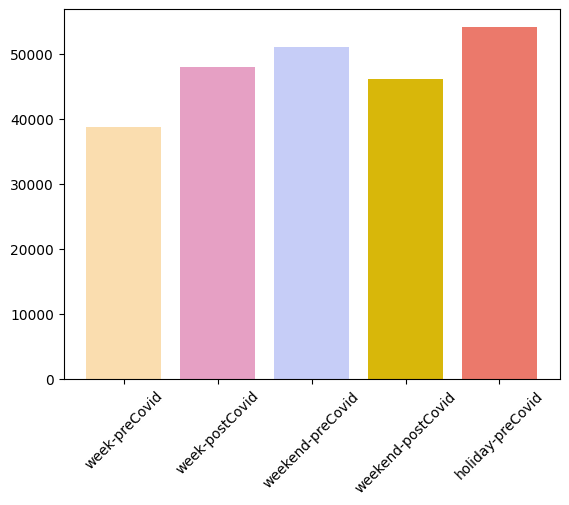

In [336]:
# @title Affluence Median
MedWeekPreCovid=PreCovWeekDF['attendance'].median()
MedWeekPostCovid=PostCovWeekDF['attendance'].median()

MedWEndPreCovid=PreCovWEndDF['attendance'].median()
MedWEndPostCovid=PostCovWEndDF['attendance'].median()

MedHolPreCovid=PreCovHolDF['attendance'].median()

values2=[MedWeekPreCovid,MedWeekPostCovid,MedWEndPreCovid,MedWEndPostCovid,MedHolPreCovid]
classes=["week-preCovid", "week-postCovid", "weekend-preCovid", "weekend-postCovid", "holiday-preCovid"]

wes_anderson_colors = [
    '#FADDAF',  # Pastel yellow
    '#E6A0C4',  # Muted pink
    '#C6CDF7',  # Light blue
    '#D8B70A',  # Gold
    '#EB796B',  # Salmon pink
    '#73937E',  # Muted green
    '#AB947E',  # Warm beige
    '#9A8822',  # Olive green
    '#3E423A',  # Dark moss green
    '#9B1B30',  # Rich maroon
]

plt.bar(classes, values2, color=wes_anderson_colors)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Med-week-preCovid'),
  Text(1, 0, 'Avg-week-preCovid'),
  Text(2, 0, 'Med-week-postCovid'),
  Text(3, 0, 'Avg-week-postCovid'),
  Text(4, 0, 'Med-weekend-preCovid'),
  Text(5, 0, 'Avg-weekend-preCovid'),
  Text(6, 0, 'Med-weekend-postCovid'),
  Text(7, 0, 'Avg-weekend-postCovid')])

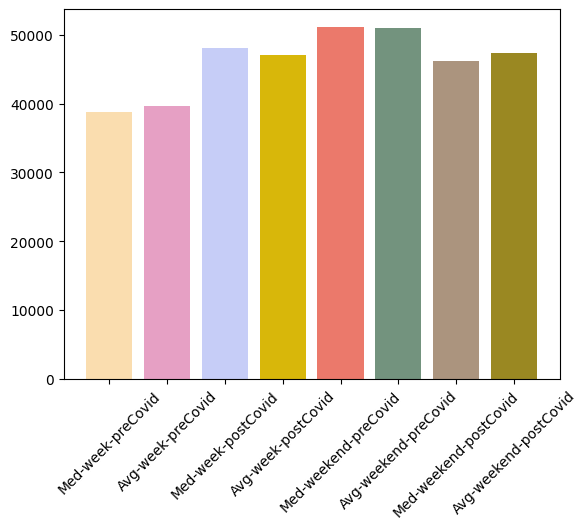

In [337]:
# @title Affluence Median vs Mean
MedWeekPreCovid=PreCovWeekDF['attendance'].median()
MedWeekPostCovid=PostCovWeekDF['attendance'].median()

MedWEndPreCovid=PreCovWEndDF['attendance'].median()
MedWEndPostCovid=PostCovWEndDF['attendance'].median()

MedHolPreCovid=PreCovHolDF['attendance'].median()

values3=[MedWeekPreCovid,AvgWeekPreCovid,
         MedWeekPostCovid,AvgWeekPostCovid,
         MedWEndPreCovid,AvgWEndPreCovid,
         MedWEndPostCovid,AvgWEndPostCovid,
         ]

classes2=["Med-week-preCovid", "Avg-week-preCovid",
         "Med-week-postCovid", "Avg-week-postCovid",
         "Med-weekend-preCovid", "Avg-weekend-preCovid",
         "Med-weekend-postCovid", "Avg-weekend-postCovid",
         ]



plt.bar(classes2, values3, color=wes_anderson_colors)
plt.xticks(rotation=45)